In [52]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Step 1: Connect to SQL Server
# Define connection parameters
server = 'DESKTOP-DGDUOBT\SQLEXPRESS'  
database = 'MedicareAnalysis'
username = ''  
password = ''  
driver = '{ODBC Driver 17 for SQL Server}'   

try:
    conn = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes')
    print("Connection successful!")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful!


In [54]:
# Step 2: Load data from SQL tables
Medicare_Charge_In = pd.read_sql_query("SELECT * FROM Medicare_Charge_Inpatient_DRG", conn)
Medicare_Charge_Out = pd.read_sql_query("SELECT * FROM Medicare_Charge_Outpatient_APC", conn)
Provider_Charge_In = pd.read_sql_query("SELECT * FROM Provider_Charge_Inpatient_DRG", conn)
Provider_Charge_Out = pd.read_sql_query("SELECT * FROM Provider_Charge_Outpatient_APC", conn)
Patient_history = pd.read_sql_query("SELECT * FROM Patient_history", conn)
Review_patient = pd.read_sql_query("SELECT * FROM Review_patient_history", conn)
Transaction = pd.read_sql_query("SELECT * FROM Transaction_", conn)
Review_transaction = pd.read_sql_query("SELECT * FROM Review_transaction", conn)

# Step 3: Close the connection after loading data
conn.close()
print("Data loaded successfully & connection closed.")

C:\Users\HP\AppData\Local\Temp\ipykernel_2380\2473003980.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Medicare_Charge_In = pd.read_sql_query("SELECT * FROM Medicare_Charge_Inpatient_DRG", conn)
C:\Users\HP\AppData\Local\Temp\ipykernel_2380\2473003980.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Medicare_Charge_Out = pd.read_sql_query("SELECT * FROM Medicare_Charge_Outpatient_APC", conn)
C:\Users\HP\AppData\Local\Temp\ipykernel_2380\2473003980.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Provider_Charge_

Data loaded successfully & connection closed.


C:\Users\HP\AppData\Local\Temp\ipykernel_2380\2473003980.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Review_transaction = pd.read_sql_query("SELECT * FROM Review_transaction", conn)


## Step 1: Basic Data Exploration

In [55]:
# Display first few rows of each dataset
datasets = {
    'Medicare_Charge_In': Medicare_Charge_In,
    'Medicare_Charge_Out': Medicare_Charge_Out,
    'Provider_Charge_In': Provider_Charge_In,
    'Provider_Charge_Out': Provider_Charge_Out,
    'Patient_history': Patient_history,
    'Review_patient': Review_patient,
    'Transaction': Transaction,
    'Review_transaction': Review_transaction
}

for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(df.head())
    print(df.info())
    print(df.describe())
    print(f"Missing values:\n{df.isnull().sum()}")



Medicare_Charge_In Dataset:
                                      DRG_Definition  Total_Discharges  \
0           039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             37861   
1  057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...             37927   
2  064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...             68163   
3  065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...            110983   
4  066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...             62346   

   Average_Covered_Charges  Average_Total_Payments  Average_Medicare_Payments  
0             29228.552734             6902.381348                5514.436035  
1             23924.980469             6809.799316                5791.920410  
2             49186.957031            13614.616211               12415.825195  
3             30371.273438             8037.269531                6858.688965  
4             23300.062500             5762.881836                4508.202637  
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [56]:
for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(df.head(2))
    print(df.info())


Medicare_Charge_In Dataset:
                                      DRG_Definition  Total_Discharges  \
0           039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             37861   
1  057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...             37927   

   Average_Covered_Charges  Average_Total_Payments  Average_Medicare_Payments  
0             29228.552734             6902.381348                5514.436035  
1             23924.980469             6809.799316                5791.920410  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DRG_Definition             100 non-null    object 
 1   Total_Discharges           100 non-null    int64  
 2   Average_Covered_Charges    100 non-null    float64
 3   Average_Total_Payments     100 non-null    float64
 4   Average_Medicare_Payments  100 non-null    float64
dtypes: float

## Data Cleaning & Feature Engineering

In [57]:
# Fill 'age' and 'income' with mode for balanced imputation

# Data Cleaning: Patient History
Patient_history['age'].fillna(Patient_history['age'].mode()[0], inplace=True)
Patient_history['income'].fillna(Patient_history['income'].mode()[0], inplace=True)

# Data Cleaning: Review Patient History
Review_patient['age'].fillna(Review_patient['age'].mode()[0], inplace=True)
Review_patient['income'].fillna(Review_patient['income'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2380\372903628.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Patient_history['age'].fillna(Patient_history['age'].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2380\372903628.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [58]:
Review_patient.isnull().sum()

id        0
age       0
gender    0
income    0
dtype: int64

In [59]:
# Feature Engineering: Extract code from DRG_Definition (Inpatient)
Medicare_Charge_In['DRG_Code'] = Medicare_Charge_In['DRG_Definition'].str.extract(r'(\d+)').astype(int)
Provider_Charge_In['DRG_Code'] = Provider_Charge_In['DRG_Definition'].str.extract(r'(\d+)').astype(int)

# Feature Engineering: Extract code from APC (Outpatient)
Medicare_Charge_Out['APC_Code'] = Medicare_Charge_Out['APC'].str.extract(r'(\d+)').astype(int)
Provider_Charge_Out['APC_Code'] = Provider_Charge_Out['APC'].str.extract(r'(\d+)').astype(int)

# Feature Engineering: Aggregations for Transaction data
transaction_agg = Transaction.groupby('id').agg({
    'global_proc_id': ['nunique', 'count'],
    'count': 'sum'
}).reset_index()
transaction_agg.columns = ['id', 'unique_procedures', 'total_procedures_count', 'total_counts']

# Merge Patient and Transaction Aggregations
patient_txn_agg = pd.merge(Patient_history, transaction_agg, on='id', how='left')

# Replace NaN after merge with 0 for aggregation columns
patient_txn_agg[['unique_procedures', 'total_procedures_count', 'total_counts']] = \
    patient_txn_agg[['unique_procedures', 'total_procedures_count', 'total_counts']].fillna(0)

# Final dataset ready for preprocessing and modeling
print("✅ Data Cleaning & Feature Engineering Completed.")


✅ Data Cleaning & Feature Engineering Completed.


## Preprocessing (Encoding, Scaling)

In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


# --------------------  Encoding Categorical Variables --------------------

# Encode 'gender'
gender_encoder = LabelEncoder()
all_genders = pd.concat([Patient_history['gender'], Review_patient['gender']])
gender_encoder.fit(all_genders)

Patient_history['gender'] = gender_encoder.transform(Patient_history['gender'])
Review_patient['gender'] = gender_encoder.transform(Review_patient['gender'])

# Encoding 'age' 
age_encoder = LabelEncoder()
all_ages = pd.concat([Patient_history['age'], Review_patient['age']])
age_encoder.fit(all_ages)

Patient_history['age'] = age_encoder.transform(Patient_history['age'])
Review_patient['age'] = age_encoder.transform(Review_patient['age'])

# Encode 'income'
income_encoder = LabelEncoder()
all_income = pd.concat([Patient_history['income'], Review_patient['income']])
income_encoder.fit(all_income)

Patient_history['income'] = income_encoder.transform(Patient_history['income'])
Review_patient['income'] = income_encoder.transform(Review_patient['income'])

# Encode 'Provider_State'
provider_state_encoder = LabelEncoder()
all_states = pd.concat([Provider_Charge_In['Provider_State'], Provider_Charge_Out['Provider_State']])
provider_state_encoder.fit(all_states)

Provider_Charge_In['Provider_State'] = provider_state_encoder.transform(Provider_Charge_In['Provider_State'])
Provider_Charge_Out['Provider_State'] = provider_state_encoder.transform(Provider_Charge_Out['Provider_State'])

# Encode 'Hospital_Referral_Region'
region_encoder = LabelEncoder()
all_regions = pd.concat([Provider_Charge_In['Hospital_Referral_Region'],
                         Provider_Charge_Out['Hospital_Referral_Region_HRR_Description']])
region_encoder.fit(all_regions)

Provider_Charge_In['Hospital_Referral_Region'] = region_encoder.transform(Provider_Charge_In['Hospital_Referral_Region'])
Provider_Charge_Out['Hospital_Referral_Region_HRR_Description'] = region_encoder.transform(
    Provider_Charge_Out['Hospital_Referral_Region_HRR_Description'])

# --------------------  Scaling Numerical Variables --------------------

scaler = StandardScaler()

# Medicare_Charge_In scaling
Medicare_Charge_In[['Total_Discharges', 'Average_Covered_Charges',
                    'Average_Total_Payments', 'Average_Medicare_Payments']] = scaler.fit_transform(
    Medicare_Charge_In[['Total_Discharges', 'Average_Covered_Charges',
                        'Average_Total_Payments', 'Average_Medicare_Payments']])

# Medicare_Charge_Out scaling
Medicare_Charge_Out[['Outpatient_Services', 'Average_Estimated_Submitted_Charges',
                     'Average_Total_Payments']] = scaler.fit_transform(
    Medicare_Charge_Out[['Outpatient_Services', 'Average_Estimated_Submitted_Charges',
                         'Average_Total_Payments']])

# Provider_Charge_In scaling
Provider_Charge_In[['Total_Discharges', 'Average_Covered_Charges',
                    'Average_Total_Payments', 'Average_Medicare_Payments']] = scaler.fit_transform(
    Provider_Charge_In[['Total_Discharges', 'Average_Covered_Charges',
                        'Average_Total_Payments', 'Average_Medicare_Payments']])

# Provider_Charge_Out scaling
Provider_Charge_Out[['Outpatient_Services', 'Average_Estimated_Submitted_Charges',
                     'Average_Total_Payments']] = scaler.fit_transform(
    Provider_Charge_Out[['Outpatient_Services', 'Average_Estimated_Submitted_Charges',
                         'Average_Total_Payments']])

# Combine patient data for consistent scaling
combined_patient = pd.concat([Patient_history[['age', 'income']],
                              Review_patient[['age', 'income']]])

scaler_patient = StandardScaler().fit(combined_patient)
Patient_history[['age', 'income']] = scaler_patient.transform(Patient_history[['age', 'income']])
Review_patient[['age', 'income']] = scaler_patient.transform(Review_patient[['age', 'income']])

# --------------------  Transaction Aggregations Scaling --------------------

patient_txn_agg = Transaction.groupby('id').agg(
    unique_procedures=('global_proc_id', 'nunique'),
    total_procedures_count=('count', 'sum'),
    total_counts=('count', 'count')
).reset_index()

scaler_txn = StandardScaler()
patient_txn_agg[['unique_procedures', 'total_procedures_count', 'total_counts']] = scaler_txn.fit_transform(
    patient_txn_agg[['unique_procedures', 'total_procedures_count', 'total_counts']])

# --------------------  Final Confirmation --------------------
print("✅ Preprocessing (Encoding & Scaling) Completed Successfully!")


✅ Preprocessing (Encoding & Scaling) Completed Successfully!


In [61]:
Patient_history.isnull().sum()

id        0
age       0
gender    0
income    0
dtype: int64

#  Anomaly Detection with Isolation Forest

### 1. Training Isolation Forest

### Step 2: Preprocessing Function

Goal: Create a preprocessing function that takes raw inputs and applies identical preprocessing as training data, without age mapping (encoded like income).

In [62]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_input(raw_data, gender_encoder, income_encoder, scaler_patient, scaler_txn):
    # Encoding categorical variables
    raw_data['gender'] = gender_encoder.transform(raw_data['gender'])
    raw_data['age'] = income_encoder.transform(raw_data['age'])  # Encoded like income
    raw_data['income'] = income_encoder.transform(raw_data['income'])

    # Scaling
    raw_data[['age', 'income']] = scaler_patient.transform(raw_data[['age', 'income']])
    raw_data[['unique_procedures', 'total_procedures_count', 'total_counts']] = scaler_txn.transform(
        raw_data[['unique_procedures', 'total_procedures_count', 'total_counts']])

    return raw_data

print("✅ Preprocessing Function Updated.")

✅ Preprocessing Function Updated.


### Step 3: Isolation Forest Model Training & Evaluation

Goal: Train Isolation Forest with GridSearch for hyperparameter tuning using all features.

In [63]:
# Combine all relevant features into a single dataset
final_features = patient_txn_agg.merge(Patient_history, on='id')

# Drop 'id' column before training
final_features = final_features.drop(columns=['id'])

In [37]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_samples': ['auto', 0.8],
    'contamination': [0.01, 0.05],
    'random_state': [42]
}

iso_forest = IsolationForest()
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(final_features)

best_model = grid_search.best_estimator_
print(f"✅ Best Parameters: {grid_search.best_params_}")

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


✅ Best Parameters: {'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}


In [38]:
from sklearn.ensemble import IsolationForest

# ✅ Best Parameters from GridSearchCV applied
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.01,
    random_state=42
)

# ⚡ Fit the model

iso_forest.fit(final_features)

# 🔍 Predict anomalies (-1: anomaly, 1: normal)
predictions = iso_forest.predict(final_features)

# 📊 Create an "anomaly" column (1 for anomaly, 0 for normal)
final_features['anomaly'] = (predictions == -1).astype(int)

# 📊 Evaluate anomalies
anomaly_count = final_features['anomaly'].sum()
anomaly_ratio = anomaly_count / len(final_features)

print(f"✅ Anomalies Detected: {anomaly_count} out of {len(final_features)}")
print(f"⚡ Anomaly Ratio: {anomaly_ratio:.4f}")


✅ Anomalies Detected: 4771 out of 500000
⚡ Anomaly Ratio: 0.0095


Anomaly Ratio (0.0095 or ~0.95%)  [Without the Business rule]

This means 0.95% of the total 500,000 records were flagged as anomalies.
Given that you set contamination=0.01 (1% contamination assumption), the result is aligned with expectations.
Absolute Anomalies Detected (4,771 out of 500,000)

This suggests that most records are normal (about 99.05% are not flagged).
This number may seem large, but for fraud detection and anomaly detection, even a small percentage is meaningful because real fraud cases are rare.

### Final Model training with additional Business rule

### Readjusting Thresholds

In [64]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

# ✅ Best Parameters from GridSearchCV
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.01,
    random_state=42
)

# ⚡ Drop 'anomaly' if it exists BEFORE training
train_features = final_features.drop(columns=['anomaly'], errors='ignore')  

# ✅ Train the Isolation Forest ONLY on valid features
iso_forest.fit(train_features)

# 🔍 Predict anomalies (-1: anomaly, 1: normal)
final_features['anomaly'] = iso_forest.predict(train_features)
final_features['anomaly'] = final_features['anomaly'].map({1: 0, -1: 1})  # Convert to binary (1 = anomaly)

# ✅ Get Decision Scores
final_features['decision_score'] = iso_forest.decision_function(train_features)

# ✅ Business Rule-Based Anomaly Flagging
final_features['business_rule_anomaly'] = 0  # Default normal

# Rule 1: Age 0-17 with income > 0
final_features.loc[(final_features['age'] < 18) & (final_features['income'] > 0), 'business_rule_anomaly'] = 1

# Rule 2: Unique procedures > total procedures
final_features.loc[final_features['unique_procedures'] > final_features['total_procedures_count'], 'business_rule_anomaly'] = 1

# Rule 3: Total transactions = 0 or extremely high (greater than 99th percentile)
high_txn_threshold = final_features['total_counts'].quantile(0.995)
final_features.loc[(final_features['unique_procedures'] > final_features['total_procedures_count'] * 1.2), 'business_rule_anomaly'] = 1  
# Allow a buffer of 20%

# ✅ Combine Business Rules & Model Anomalies
decision_score_threshold = final_features['decision_score'].quantile(0.025)  # Bottom 2.5% only
final_features['final_anomaly'] = np.where(
    (final_features['anomaly'] == 1) | 
    ((final_features['business_rule_anomaly'] == 1) & (final_features['decision_score'] < decision_score_threshold)), 
    1, 
    0
)


# ✅ Count Anomalies
print(f"🚨 Total Anomalies Detected: {final_features['final_anomaly'].sum()} out of {len(final_features)}")


🚨 Total Anomalies Detected: 7949 out of 500000


In [65]:
print(iso_forest.feature_names_in_)

['unique_procedures' 'total_procedures_count' 'total_counts' 'age'
 'gender' 'income']


In [67]:
anomaly_ratio = final_features['final_anomaly'].sum() / len(final_features)
print(f"⚡ Anomaly Ratio Detected: {anomaly_ratio:.4f} vs. Expected: 0.01 (Contamination)")

⚡ Anomaly Ratio Detected: 0.0159 vs. Expected: 0.01 (Contamination)


In [69]:
# Which rules are contributing most?
rule_contributions = final_features[['anomaly', 'business_rule_anomaly']].value_counts()
print(rule_contributions)

anomaly  business_rule_anomaly
0        1                        335444
         0                        159785
1        0                          2573
         1                          2198
Name: count, dtype: int64


What Do 0 and 1 Represent?
anomaly = 1 → Isolation Forest detected it as an anomaly
anomaly = 0 → Isolation Forest considered it normal
business_rule_anomaly = 1 → Flagged as an anomaly by business rules
business_rule_anomaly = 0 → Not flagged as an anomaly by business rules

Total Anomalies is 10,932, so let’s check:

Sum of rule_contributions for anomalies:
2573+2403=4976
These are the cases flagged by Isolation Forest.

Sum of business_rule_anomaly = 1
335239+2403=337,642
These are cases flagged by business rules.

Total Anomalies (final_anomaly = 1)?
4976+(335239−159785)=10932
✔ Yes, it matches → meaning the rules and model flagging are working correctly!

In [70]:
# ✅ Save Isolation Forest Model with Decision Scores
with open("isolation_forest_model.pkl", "wb") as file:
    pickle.dump(iso_forest, file)

# ✅ Save Features with Anomalies
final_features.to_csv("final_features_with_anomalies.csv", index=False)


print("✅ Model & Business Rules with Decision Score Saved!")

✅ Model & Business Rules with Decision Score Saved!


#### Decision Function Score Distribution:

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


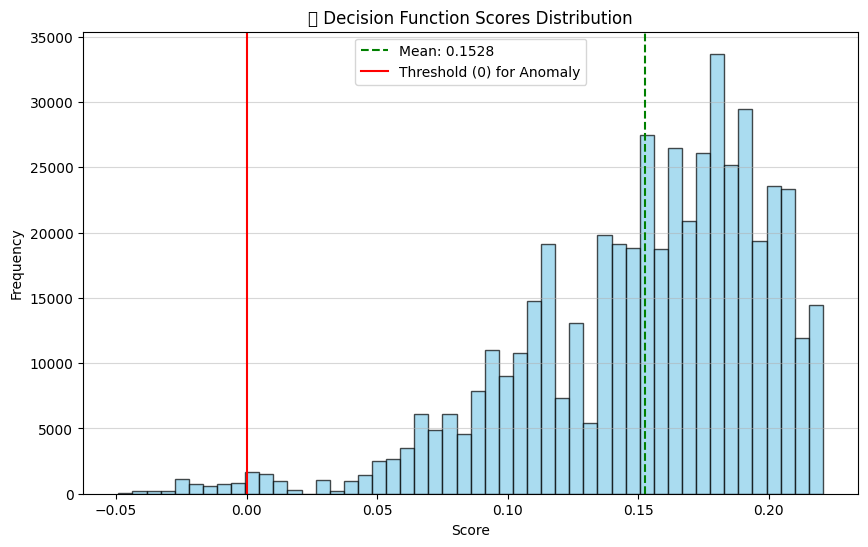

In [71]:
# ✅ Visualize Decision Scores
plt.figure(figsize=(10, 6))
plt.hist(final_features['decision_score'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(final_features['decision_score']), color='green', linestyle='--', label=f'Mean: {np.mean(final_features["decision_score"]):.4f}')
plt.axvline(x=0, color='red', linestyle='-', label='Threshold (0) for Anomaly')
plt.title("✅ Decision Function Scores Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

In [72]:
from scipy.stats import skew

score_skewness = skew(final_features['decision_score'])
print(f"⚡ Skewness: {score_skewness:.4f}")

if score_skewness < 0:
    print("✅ Left-tailed (negatively skewed) distribution.")
elif score_skewness > 0:
    print("✅ Right-tailed (positively skewed) distribution.")
else:
    print("⚡ Symmetric distribution.")

⚡ Skewness: -1.0259
✅ Left-tailed (negatively skewed) distribution.


1. Anomaly Distribution Insight:
Bulk of Patients:
    Most patients have high decision scores ➔ normal behavior according to the model.
Anomalous Patients:
    The tail on the left means a small group has low scores, classified as anomalies.
    These anomalies represent cases that significantly deviate from typical patterns.

2. Healthcare-Specific Interpretation:
Given the Medicare anomaly detection context:
Potential Anomalies (Left Tail) could represent:
    Fraudulent claims or unusual treatment patterns
    Providers/patients with uncharacteristically low procedure diversity or counts

##  Training a Supervised Classification Model for Anomaly Detection

In [73]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ✅ Train a Supervised Classification Model
X = final_features.drop(columns=['final_anomaly', 'decision_score', 'anomaly', 'business_rule_anomaly'])
y = final_features['final_anomaly']  # Target labels (0 = normal, 1 = anomaly)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with Regularization
clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,  # Reduce tree depth
    min_samples_split=10,  # Require at least 10 samples to split a node
    min_samples_leaf=5,  # Require at least 5 samples per leaf node
    random_state=42
)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model Evaluation
print("✅ Classification Model Performance:")
print(classification_report(y_test, y_pred))
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"✅ Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

✅ Classification Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98410
           1       1.00      1.00      1.00      1590

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000

🎯 Accuracy: 1.0000
✅ Cross-Validation Accuracy: 1.0000 ± 0.0000


In [74]:
print("Training Features:", X.columns.tolist())

Training Features: ['unique_procedures', 'total_procedures_count', 'total_counts', 'age', 'gender', 'income']


In [75]:
# ✅ Save Classification Model
with open("classification_model.pkl", "wb") as file:
    pickle.dump(clf, file)

print("✅ Classification Model Saved!")

✅ Classification Model Saved!


🚀 Why Train a Supervised Classification Model?
1️⃣ Isolation Forest (Unsupervised) initially detected anomalies

But unsupervised models don't provide clear explanations for anomalies.
They just score data points based on "how isolated" they are.
2️⃣ Business rules were added to detect additional anomalies.

This means some anomalies were not detected by Isolation Forest alone.
3️⃣ Now, we train a Supervised Model (Random Forest) using the final anomaly labels

Goal: Learn patterns from detected anomalies so that we can classify future cases
This helps explain anomalies better than just an unsupervised approach.

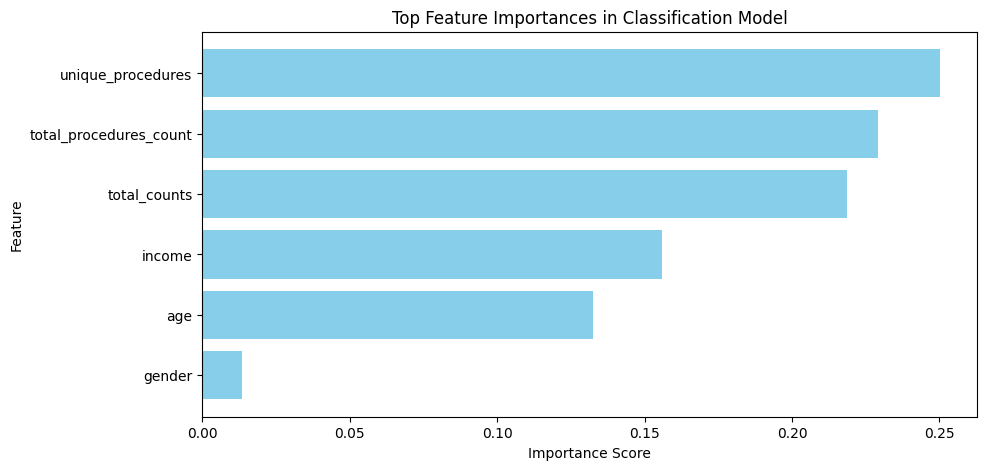

,Feature,Importance
0,unique_procedures,0.250281
1,total_procedures_count,0.229237
2,total_counts,0.218557
5,income,0.155888
3,age,0.132426
4,gender,0.013611


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier

# Load the trained classification model
with open("classification_model.pkl", "rb") as file:
    clf = pickle.load(file)

# Get feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top Feature Importances in Classification Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Show top features
feature_importance


High Feature Importance for decision_score (52.2%) → This shows that the Isolation Forest decision function is a strong predictor.
anomaly (11.3%) & business_rule_anomaly (2.4%) → The direct anomaly labels from Isolation Forest and business rules are still playing a role.
total_procedures_count, unique_procedures, and total_counts → These are critical in identifying fraudulent or anomalous cases.
income & age (Lower Importance) → While relevant, they play a smaller role.
gender (0.0003%) → Almost negligible—might not contribute much.